X.shape = (569, 30)
y.shape = (569,)
train accuracy cancer= 0.000%
test accuracy cancer= 0.000%

self.y_train.shape = (1080,)
y_test.shape = (120,)
self.X_train.shape = (1080, 64, 64, 3)
X_test.shape = (120, 64, 64, 3)
Розподіл класів у train: [180 180 180 180 180 180]
Розподіл класів у test: [20 20 20 20 20 20]


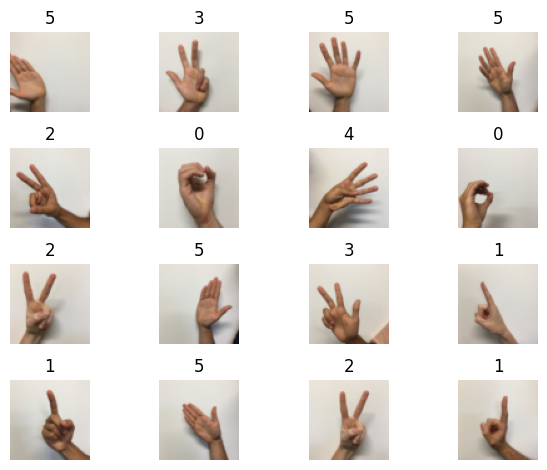

One-hot encoded shape: (1080, 6)
Навчаємо SVM...
train accuracy= 96.759%
test accuracy= 94.167%


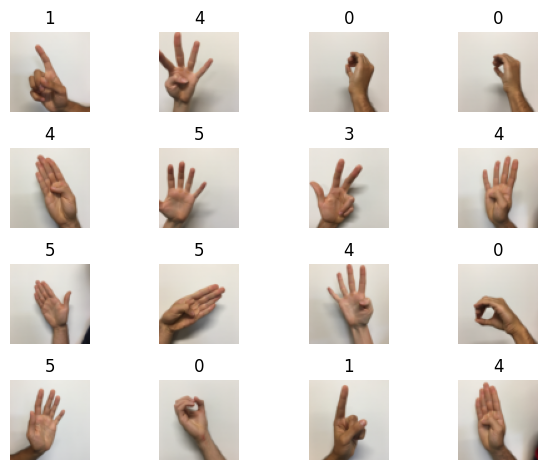

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC


class frsk:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def cancer(self):
        X, y = load_breast_cancer(return_X_y=True)
        print('X.shape =', X.shape)
        print('y.shape =', y.shape)
        self.clf = None
        print("train accuracy cancer= {:.3%}".format(0))
        print("test accuracy cancer= {:.3%}".format(0))

    def load_dataset(self):
        cwd = os.getcwd()
        path = os.path.join(cwd, 'data')
        fn = os.path.join(path, 'train_signs.h5')
        train_dataset = h5py.File(fn, "r")
        self.X_train = np.array(train_dataset["train_set_x"][:]) / 255.0  # нормалізація
        self.y_train = np.array(train_dataset["train_set_y"][:])

        fn = os.path.join(path, 'test_signs.h5')
        test_dataset = h5py.File(fn, "r")
        X_test = np.array(test_dataset["test_set_x"][:]) / 255.0  # нормалізація
        y_test = np.array(test_dataset["test_set_y"][:])

        classes = np.array(test_dataset["list_classes"][:])

        self.y_train = self.y_train.reshape((self.y_train.shape[0],))
        y_test = y_test.reshape((y_test.shape[0],))

        print('\nself.y_train.shape =', self.y_train.shape)
        print('y_test.shape =', y_test.shape)
        print('self.X_train.shape =', self.X_train.shape)
        print('X_test.shape =', X_test.shape)

        # розподіл класів
        print("Розподіл класів у train:", np.bincount(self.y_train))
        print("Розподіл класів у test:", np.bincount(y_test))

        return self.X_train, self.y_train, X_test, y_test, classes

    def disp_samples_grid(self, X, n_rows, n_cols=None, y=None):
        if n_cols is None:
            n_cols = n_rows
        indices = np.random.randint(0, len(X), n_rows * n_cols)
        for i in range(n_rows):
            for j in range(n_cols):
                index = n_rows * i + j
                ax = plt.subplot(n_rows, n_cols, index + 1)
                plt.imshow(X[indices[index]])
                if y is not None:
                    plt.title(y[indices[index]])
                plt.axis('off')
        plt.tight_layout(h_pad=1)
        plt.gcf().canvas.manager.set_window_title('Train')
        plt.show()

    def convert_one_hot(self, Y, C):
        return np.eye(C)[Y.reshape(-1)]

    plt.figure()

    def res(self, X_test):
        X_test_flat = X_test.reshape(X_test.shape[0], -1)
        predicted = self.clf.predict(X_test_flat)
        self.disp_samples_grid(X_test, n_rows=4, y=predicted)
        plt.gcf().canvas.manager.set_window_title('Test set prediction')
        plt.show()

    def SVM(self, X_test, y_test):
        print("Навчаємо SVM...")

        X_train_flat = self.X_train.reshape(self.X_train.shape[0], -1)
        X_test_flat = X_test.reshape(X_test.shape[0], -1)

        self.clf = SVC(C=1.0, kernel='rbf', gamma='scale', class_weight='balanced')
        self.clf.fit(X_train_flat, self.y_train)

        print("train accuracy= {:.3%}".format(self.clf.score(X_train_flat, self.y_train)))
        print("test accuracy= {:.3%}".format(self.clf.score(X_test_flat, y_test)))


loader = frsk()
loader.cancer()
X_train, y_train, X_test, y_test, classes = loader.load_dataset()
loader.disp_samples_grid(X_train, n_rows=4, y=y_train)
one_hot_labels = loader.convert_one_hot(y_train, len(classes))
print("One-hot encoded shape:", one_hot_labels.shape)
loader.SVM(X_test, y_test)
loader.res(X_test)

